# Evaluation of the RF losses due to the beam coupling impedance

*A. Lasheen*

# Importing the python modules

## General import

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Impedance tools import

In [2]:
from impedance_toolbox.impedance_params import ImpedanceParameters

## Adding an impedance source

### Importing an impedance source or a full impedance model

In [3]:
impedanceDirectory = '../SPS_impedance'

### Creating the ImpedanceParameters object

In [4]:
impedParams = ImpedanceParameters(impedanceDirectory)

### Adding some resonators to the model (specifying the frequency array)

In [5]:
impedParams.addResonators([360.5, 29.7119e3], 
                          [149e6, 781e6], 
                          [1119, 2198], 
                          freqArray=np.linspace(0, 1e9, 50000))

blond\impedances\impedance_sources.py:236: RuntimeWarning: divide by zero encountered in true_divide
  self.frequency_R[i] / self.frequency_array))
blond\impedances\impedance_sources.py:236: RuntimeWarning: invalid value encountered in multiply
  self.frequency_R[i] / self.frequency_array))
blond\impedances\impedance_sources.py:236: RuntimeWarning: invalid value encountered in true_divide
  self.frequency_R[i] / self.frequency_array))


### Plotting the impedance

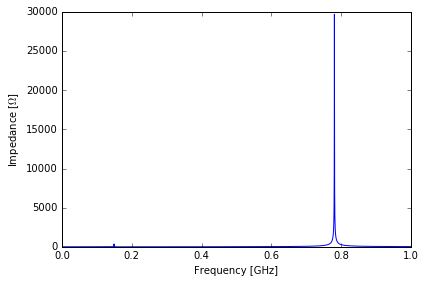

In [6]:
plt.figure('Impedance')
plt.clf()
plt.plot(impedParams.freqArray/1e9, np.abs(impedParams.impedance))
plt.xlabel('Frequency [GHz]')
plt.ylabel('Impedance [$\\Omega$]')
plt.tight_layout()

## Fitting the impedance with resonators

### Using an initial guess to find roughly R, f and Q

In [7]:
r_start, f_start, Q_start = impedParams.fitInitialGuess()

print(r_start, f_start, Q_start)

(array([   360.02990375,  29702.87267826]), array([  1.49002980e+08,   7.80995620e+08]), array([ 1241.66666667,  2297.        ]))


### Using the initial guess to make the fit, with +-10% bounds on R and f

In [8]:
fittedParameters = impedParams.fitResonators(r_start, 
                                             f_start, 
                                             Q_start, 
                                             RShuntBound = 0.1, 
                                             freqBound = 0.1, 
                                             QBound = None,
                                             RShuntScale=1e3, 
                                             freqScale=1e9, 
                                             QScale=1e3)

print(fittedParameters)

C:\Software\Anaconda2\lib\site-packages\scipy\optimize\_minimize.py:394: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)
impedance_toolbox\impedance_params.py:254: RuntimeWarning: divide by zero encountered in log
  residue = np.sqrt(np.nansum(( np.log(np.abs(impedanceTable[:,1] + impedanceTable[:,2]*1j)) - np.log(np.abs(resonatorForFit.impedance)))**2))
impedance_toolbox\impedance_params.py:254: RuntimeWarning: invalid value encountered in subtract
  residue = np.sqrt(np.nansum(( np.log(np.abs(impedanceTable[:,1] + impedanceTable[:,2]*1j)) - np.log(np.abs(resonatorForFit.impedance)))**2))


Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 535
         Function evaluations: 847
(array([   360.50019602,  29711.89613222]), array([  1.49000000e+08,   7.81000000e+08]), array([ 1119.00064657,  2197.99971462]))


### Using the previous result with no boundary on R and f for fine results

In [9]:
fittedParameters = impedParams.fitResonators(fittedParameters[0], 
                                             fittedParameters[1], 
                                             fittedParameters[2],
                                             RShuntScale=1e3, 
                                             freqScale=1e9, 
                                             QScale=1e3)

print(fittedParameters)

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 145
         Function evaluations: 265
(array([   360.50019602,  29711.89613222]), array([  1.49000000e+08,   7.81000000e+08]), array([ 1119.00064657,  2197.99971462]))


### Plotting the result of the fit in three steps

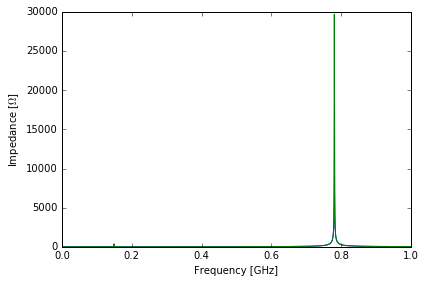

In [10]:
plt.figure('Impedance')
plt.clf()
plt.plot(impedParams.freqArray/1e9, np.abs(impedParams.impedance))
plt.plot(impedParams.resonatorForFit.frequency_array/1e9, np.abs(impedParams.resonatorForFit.impedance))
plt.xlabel('Frequency [GHz]')
plt.ylabel('Impedance [$\\Omega$]')
plt.tight_layout()

### Fitting only in a given window in frequency (the second peak)

In [11]:
fittedParameters = impedParams.fitResonators(r_start[1]*0.8, 
                                             f_start[1], 
                                             Q_start[1], 
                                             frequencyWindow=[0.6e9,1.0e9],
                                             RShuntScale=1e3, 
                                             freqScale=1e9, 
                                             QScale=1e3)

print(fittedParameters)

Optimization terminated successfully.
         Current function value: 0.203579
         Iterations: 139
         Function evaluations: 245
(array([ 29714.63995315]), array([  7.81000558e+08]), array([ 2198.41559325]))


### Plotting the result of the fit using a window

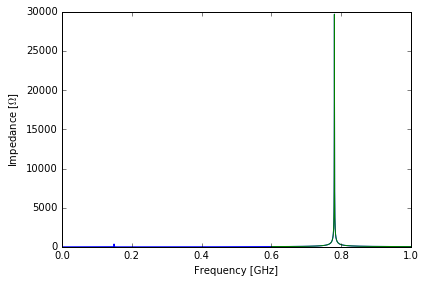

In [12]:
plt.figure('Impedance')
plt.clf()
plt.plot(impedParams.freqArray/1e9, np.abs(impedParams.impedance))
plt.plot(impedParams.resonatorForFit.frequency_array/1e9, np.abs(impedParams.resonatorForFit.impedance))
plt.xlabel('Frequency [GHz]')
plt.ylabel('Impedance [$\\Omega$]')
plt.tight_layout()

### All the available options to perform fits